In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/capstone/Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
#taking only 50k samples into another dataframe as df1
df1 = df.sample(50000,random_state=250)


In [ ]:
df1.reset_index(inplace =True)

In [ ]:
# df1.head()
df1 = df1.drop('index',axis=1)
df1.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,Paseo Garc a Faria 37 47 Sant Mart 08019 Barce...,241,8/30/2016,8.2,Occidental Atenea Mar Adults Only,Italy,Bathtub and sink flush wasn t working properl...,138,2500,We ve had a room with sea view and was lovely...,48,8,7.5,"[' Leisure trip ', ' Couple ', ' Superior Doub...",338 day,41.402362,2.211905
1,Prins Hendrikkade 59 72 Amsterdam City Center ...,493,12/8/2016,8.6,NH Collection Amsterdam Barbizon Palace,Gabon,The bedroom was tight and very small They exp...,23,2865,To be near to the main train station,9,3,5.4,"[' Business trip ', ' Group ', ' Premium Doubl...",238 day,52.376418,4.900220
2,Bryanston Street Marble Arch Westminster Borou...,908,2/16/2016,8.5,Amba Hotel Marble Arch,United Kingdom,No Negative,0,3980,Great to have ipads in the room and the break...,13,8,9.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",534 day,51.514400,-0.156551
3,6 rue Balzac 8th arr 75008 Paris France,117,7/8/2017,8.3,H tel Balzac,Pakistan,There was only one small issue with the room ...,47,694,The location was excellent It was off the Cha...,79,1,9.2,"[' Leisure trip ', ' Couple ', ' Superior Doub...",26 days,48.873278,2.300417
4,16 22 Great Russell Street Camden London WC1B ...,300,3/26/2016,9.0,The Bloomsbury Hotel,United Kingdom,Price of breakfast was high We went to an ama...,68,1254,Amazing location and quality of hotel Being c...,25,1,9.6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",495 day,51.517167,-0.129053


In [ ]:
#append both positive and negative reviews
review = []
for row in range(0,len(df1)):
    review.append(''.join(str(x) for x in df1.iloc[row,[6,9]]))
#     review = review.strip()


In [ ]:
review = pd.DataFrame(review)
review.head()

,0
0,Bathtub and sink flush wasn t working properl...
1,The bedroom was tight and very small They exp...
2,No Negative Great to have ipads in the room an...
3,There was only one small issue with the room ...
4,Price of breakfast was high We went to an ama...


In [ ]:
review.columns = ['reviews']
review.head()

,reviews
0,Bathtub and sink flush wasn t working properl...
1,The bedroom was tight and very small They exp...
2,No Negative Great to have ipads in the room an...
3,There was only one small issue with the room ...
4,Price of breakfast was high We went to an ama...


In [ ]:
review['reviews'] = review['reviews'].apply(lambda x:x.replace('No Negative',''))
review['reviews'] = review['reviews'].apply(lambda x:x.replace('No Positive',''))
review.head()

,reviews
0,Bathtub and sink flush wasn t working properl...
1,The bedroom was tight and very small They exp...
2,Great to have ipads in the room and the break...
3,There was only one small issue with the room ...
4,Price of breakfast was high We went to an ama...


In [ ]:

#appending the combined column(i.e review ) in df1
df1['reviews'] = review

In [ ]:
df1.isnull().sum()

Hotel_Address                                   0
Additional_Number_of_Scoring                    0
Review_Date                                     0
Average_Score                                   0
Hotel_Name                                      0
Reviewer_Nationality                            0
Negative_Review                                 0
Review_Total_Negative_Word_Counts               0
Total_Number_of_Reviews                         0
Positive_Review                                 0
Review_Total_Positive_Word_Counts               0
Total_Number_of_Reviews_Reviewer_Has_Given      0
Reviewer_Score                                  0
Tags                                            0
days_since_review                               0
lat                                           323
lng                                           323
reviews                                         0
dtype: int64

In [ ]:
df1 = df1.dropna()
df1.reset_index(inplace=True)

In [ ]:
df1.isnull().sum()

index                                         0
Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
reviews                                       0
dtype: int64

In [ ]:
# making a copy of df1 after removing all the null values 
df2 = df1.copy(deep=True)

In [ ]:
#Extracting the Country from the 'Hotel_Address' and creating the new column
df2['Hotel_Country'] = df2['Hotel_Address'].apply(lambda x: x.split()[-1])
df2['Hotel_Country'].value_counts()

Kingdom        25555
Spain           5735
France          5651
Netherlands     5550
Italy           3645
Austria         3541
Name: Hotel_Country, dtype: int64

In [ ]:
#Replaced the Kingdom as 'United Kingdom' 
df2['Hotel_Country'] = df2['Hotel_Country'].replace('Kingdom','United Kingdom')

In [ ]:
#Here Review_Date is a str 
# and extracting the year and month from the date 
# and storing as yyyymm as one column/feature
yr = df2.Review_Date.str[-4:]  
month =df2.Review_Date.str[:2]
month = month.apply(lambda x:x.replace('/',''))
# df2['year_Month'] = ((df2.Review_Date.str[-4:].astype(int)*100)+(df2.Review_Date.str[:2].astype(int))).astype(str)
df2['year_Month'] = ((yr.astype(int)*100)+(month.astype(int))).astype(str)
df2['review_month'] = month.astype(int)
df2['year_Month'].value_counts()

201608    2669
201607    2515
201610    2320
201707    2311
201605    2297
201609    2190
201705    2184
201701    2151
201706    2099
201604    2074
201704    2066
201606    2051
201612    2042
201703    1960
201603    1930
201509    1903
201702    1887
201508    1883
201601    1850
201510    1844
201602    1827
201611    1763
201511    1741
201512    1737
201708     383
Name: year_Month, dtype: int64

In [ ]:
# 'Reviewer_Nationality' columns contains spaces .
# treating the spaces as replacing it with 'Others'
df2['Reviewer_Nationality'] = df2['Reviewer_Nationality'].replace(' ','Others')

In [ ]:
df2.head()

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,reviews,Hotel_Country,year_Month,review_month
0,0,Paseo Garc a Faria 37 47 Sant Mart 08019 Barce...,241,8/30/2016,8.2,Occidental Atenea Mar Adults Only,Italy,Bathtub and sink flush wasn t working properl...,138,2500,We ve had a room with sea view and was lovely...,48,8,7.5,"[' Leisure trip ', ' Couple ', ' Superior Doub...",338 day,41.402362,2.211905,Bathtub and sink flush wasn t working properl...,Spain,201608,8
1,1,Prins Hendrikkade 59 72 Amsterdam City Center ...,493,12/8/2016,8.6,NH Collection Amsterdam Barbizon Palace,Gabon,The bedroom was tight and very small They exp...,23,2865,To be near to the main train station,9,3,5.4,"[' Business trip ', ' Group ', ' Premium Doubl...",238 day,52.376418,4.900220,The bedroom was tight and very small They exp...,Netherlands,201612,12
2,2,Bryanston Street Marble Arch Westminster Borou...,908,2/16/2016,8.5,Amba Hotel Marble Arch,United Kingdom,No Negative,0,3980,Great to have ipads in the room and the break...,13,8,9.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",534 day,51.514400,-0.156551,Great to have ipads in the room and the break...,United Kingdom,201602,2
3,3,6 rue Balzac 8th arr 75008 Paris France,117,7/8/2017,8.3,H tel Balzac,Pakistan,There was only one small issue with the room ...,47,694,The location was excellent It was off the Cha...,79,1,9.2,"[' Leisure trip ', ' Couple ', ' Superior Doub...",26 days,48.873278,2.300417,There was only one small issue with the room ...,France,201707,7
4,4,16 22 Great Russell Street Camden London WC1B ...,300,3/26/2016,9.0,The Bloomsbury Hotel,United Kingdom,Price of breakfast was high We went to an ama...,68,1254,Amazing location and quality of hotel Being c...,25,1,9.6,"[' Leisure trip ', ' Couple ', ' Superior Doub...",495 day,51.517167,-0.129053,Price of breakfast was high We went to an ama...,United Kingdom,201603,3


In [ ]:
for i in range(0,len(df2['Tags'])):
    df2['Tags'][i] = df2['Tags'][i].replace('[','').replace(']','').replace("'",'').strip()
    df2['Tags'][i] = df2['Tags'][i].split(',')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2['Trip'] = df2['Tags'].apply(lambda x : [str(x[i]) for i in range(0,len(x)) if 'trip' in x[i]])

In [ ]:
df2['Trip'] =  df2['Trip'].apply(lambda x: x[0].strip() if len(x) !=0 else 'Nan')

In [ ]:
#Dropping the index column which was created while resetting the index
df2 = df2.drop('index',axis=1)

In [ ]:
df2.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,reviews,Hotel_Country,year_Month,review_month,Trip
0,Paseo Garc a Faria 37 47 Sant Mart 08019 Barce...,241,8/30/2016,8.2,Occidental Atenea Mar Adults Only,Italy,Bathtub and sink flush wasn t working properl...,138,2500,We ve had a room with sea view and was lovely...,48,8,7.5,"[Leisure trip , Couple , Superior Double o...",338 day,41.402362,2.211905,Bathtub and sink flush wasn t working properl...,Spain,201608,8,Leisure trip
1,Prins Hendrikkade 59 72 Amsterdam City Center ...,493,12/8/2016,8.6,NH Collection Amsterdam Barbizon Palace,Gabon,The bedroom was tight and very small They exp...,23,2865,To be near to the main train station,9,3,5.4,"[Business trip , Group , Premium Double or...",238 day,52.376418,4.900220,The bedroom was tight and very small They exp...,Netherlands,201612,12,Business trip
2,Bryanston Street Marble Arch Westminster Borou...,908,2/16/2016,8.5,Amba Hotel Marble Arch,United Kingdom,No Negative,0,3980,Great to have ipads in the room and the break...,13,8,9.2,"[Leisure trip , Couple , Standard Double R...",534 day,51.514400,-0.156551,Great to have ipads in the room and the break...,United Kingdom,201602,2,Leisure trip
3,6 rue Balzac 8th arr 75008 Paris France,117,7/8/2017,8.3,H tel Balzac,Pakistan,There was only one small issue with the room ...,47,694,The location was excellent It was off the Cha...,79,1,9.2,"[Leisure trip , Couple , Superior Double R...",26 days,48.873278,2.300417,There was only one small issue with the room ...,France,201707,7,Leisure trip
4,16 22 Great Russell Street Camden London WC1B ...,300,3/26/2016,9.0,The Bloomsbury Hotel,United Kingdom,Price of breakfast was high We went to an ama...,68,1254,Amazing location and quality of hotel Being c...,25,1,9.6,"[Leisure trip , Couple , Superior Double R...",495 day,51.517167,-0.129053,Price of breakfast was high We went to an ama...,United Kingdom,201603,3,Leisure trip


In [ ]:
#Extracting the no of stayed nights from the Tags column into the new column named 'Satyed_nights'
import re
def tag_nights(x):
    if ('night' in x) or ('nights' in x):
        t = re.search(r'\d\snight\D?',str(x)).span()
        return int(x[t[0]:t[0]+1])   #t[0]:t[0]+1
    else:
        return 0

In [ ]:
type(df2['Tags'][0])

list

In [ ]:
df2['Stayed nights'] = df2['Tags']
for i in range(0,len(df2)):
    df2['Stayed nights'][i] = tag_nights(str(df2['Tags'][i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,reviews,Hotel_Country,year_Month,review_month,Trip,Stayed nights
0,Paseo Garc a Faria 37 47 Sant Mart 08019 Barce...,241,8/30/2016,8.2,Occidental Atenea Mar Adults Only,Italy,Bathtub and sink flush wasn t working properl...,138,2500,We ve had a room with sea view and was lovely...,48,8,7.5,"[Leisure trip , Couple , Superior Double o...",338 day,41.402362,2.211905,Bathtub and sink flush wasn t working properl...,Spain,201608,8,Leisure trip,6
1,Prins Hendrikkade 59 72 Amsterdam City Center ...,493,12/8/2016,8.6,NH Collection Amsterdam Barbizon Palace,Gabon,The bedroom was tight and very small They exp...,23,2865,To be near to the main train station,9,3,5.4,"[Business trip , Group , Premium Double or...",238 day,52.376418,4.900220,The bedroom was tight and very small They exp...,Netherlands,201612,12,Business trip,2
2,Bryanston Street Marble Arch Westminster Borou...,908,2/16/2016,8.5,Amba Hotel Marble Arch,United Kingdom,No Negative,0,3980,Great to have ipads in the room and the break...,13,8,9.2,"[Leisure trip , Couple , Standard Double R...",534 day,51.514400,-0.156551,Great to have ipads in the room and the break...,United Kingdom,201602,2,Leisure trip,1
3,6 rue Balzac 8th arr 75008 Paris France,117,7/8/2017,8.3,H tel Balzac,Pakistan,There was only one small issue with the room ...,47,694,The location was excellent It was off the Cha...,79,1,9.2,"[Leisure trip , Couple , Superior Double R...",26 days,48.873278,2.300417,There was only one small issue with the room ...,France,201707,7,Leisure trip,6
4,16 22 Great Russell Street Camden London WC1B ...,300,3/26/2016,9.0,The Bloomsbury Hotel,United Kingdom,Price of breakfast was high We went to an ama...,68,1254,Amazing location and quality of hotel Being c...,25,1,9.6,"[Leisure trip , Couple , Superior Double R...",495 day,51.517167,-0.129053,Price of breakfast was high We went to an ama...,United Kingdom,201603,3,Leisure trip,1


In [ ]:
#Extracting the year from the Review date and creating the new column as 'yr'

df2['yr']=pd.Series(yr).astype(int)

In [ ]:
df2['review_month'] = df2['review_month'].astype(int)
df2['Stayed nights'] = df2['Stayed nights'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49677 entries, 0 to 49676
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               49677 non-null  object 
 1   Additional_Number_of_Scoring                49677 non-null  int64  
 2   Review_Date                                 49677 non-null  object 
 3   Average_Score                               49677 non-null  float64
 4   Hotel_Name                                  49677 non-null  object 
 5   Reviewer_Nationality                        49677 non-null  object 
 6   Negative_Review                             49677 non-null  object 
 7   Review_Total_Negative_Word_Counts           49677 non-null  int64  
 8   Total_Number_of_Reviews                     49677 non-null  int64  
 9   Positive_Review                             49677 non-null  object 
 10  Review_Tot

In [ ]:
#having Nan values in the Trip column hence replace it with others i.e Leisure trip,Business Trip and others
df2['Trip'] = df2['Trip'].replace('Nan','Others')


In [ ]:
df2.Trip.value_counts()

Leisure trip     40280
Business trip     7952
Others            1445
Name: Trip, dtype: int64

In [ ]:
df2.isnull().sum()
#no null values 

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
reviews                                       0
Hotel_Country                                 0
year_Month                                    0
review_month                            

In [ ]:
df2.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,reviews,Hotel_Country,year_Month,review_month,Trip,Stayed nights,yr
0,Paseo Garc a Faria 37 47 Sant Mart 08019 Barce...,241,8/30/2016,8.2,Occidental Atenea Mar Adults Only,Italy,Bathtub and sink flush wasn t working properl...,138,2500,We ve had a room with sea view and was lovely...,48,8,7.5,"[Leisure trip , Couple , Superior Double o...",338 day,41.402362,2.211905,Bathtub and sink flush wasn t working properl...,Spain,201608,8,Leisure trip,6,2016
1,Prins Hendrikkade 59 72 Amsterdam City Center ...,493,12/8/2016,8.6,NH Collection Amsterdam Barbizon Palace,Gabon,The bedroom was tight and very small They exp...,23,2865,To be near to the main train station,9,3,5.4,"[Business trip , Group , Premium Double or...",238 day,52.376418,4.900220,The bedroom was tight and very small They exp...,Netherlands,201612,12,Business trip,2,2016
2,Bryanston Street Marble Arch Westminster Borou...,908,2/16/2016,8.5,Amba Hotel Marble Arch,United Kingdom,No Negative,0,3980,Great to have ipads in the room and the break...,13,8,9.2,"[Leisure trip , Couple , Standard Double R...",534 day,51.514400,-0.156551,Great to have ipads in the room and the break...,United Kingdom,201602,2,Leisure trip,1,2016
3,6 rue Balzac 8th arr 75008 Paris France,117,7/8/2017,8.3,H tel Balzac,Pakistan,There was only one small issue with the room ...,47,694,The location was excellent It was off the Cha...,79,1,9.2,"[Leisure trip , Couple , Superior Double R...",26 days,48.873278,2.300417,There was only one small issue with the room ...,France,201707,7,Leisure trip,6,2017
4,16 22 Great Russell Street Camden London WC1B ...,300,3/26/2016,9.0,The Bloomsbury Hotel,United Kingdom,Price of breakfast was high We went to an ama...,68,1254,Amazing location and quality of hotel Being c...,25,1,9.6,"[Leisure trip , Couple , Superior Double R...",495 day,51.517167,-0.129053,Price of breakfast was high We went to an ama...,United Kingdom,201603,3,Leisure trip,1,2016


In [ ]:
df2['reviews'][0]   #stopwords ('wasn','didn')

' Bathtub and sink flush wasn t working properly even if we told the reception The second day they removed the hand soap and didn t replaced it until we told the reception on the fourth day Cleaning ladies forgot to clean our room once even if we left every morning at 10 30am Swimming pool sun chairs are not free 20 each A bit expensive imho considering you can have 2 sun chairs and one umbrella for 30 on the beach Same for hotel bike rent 15 for 2hrs is way too much when you can rent a bicycle for 6 per day in Barcelona centre Overall Barcelona has got a general drainage issue and sometimes the whole area gets quite smelly and hotel rooms too Not their fault but the hotel management should consider it  We ve had a room with sea view and was lovely The location is great if you want to go to the beach everyday and stay away from the crowd of Barcelona centre Mattresses really comfy on big beds The hotel is quite modern and stylish '

In [ ]:
# import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords

In [ ]:
# nltk.word_tokenize("mightn't")

In [ ]:
# lem = WordNetLemmatizer()
# lem.lemmatize('wasnt')

In [ ]:
# nltk.download('stopwords')
# stopwords.words('english')    

In [ ]:
# df2['reviews'][0].strip().split()

In [ ]:
# st = df['reviews'][0].strip().split()
# update = []
# for word in st:
#   if word  in ['wasn','didn','don' ,'wouldn','weren']:
#     # st.replace(word,word[:-1]+' not')
#     word = word[:-1]+' not'
#     update.append(word)
#   else:
#     update.append(word)

# update

In [ ]:
#replacing the no in the reviews columns:
import re

In [ ]:
# this function is used to preprocess the some of the stopwords for ex: converting the 'wasn' to 'was not' (to retain the meaning of the words in the reviews )
def text_stopwords__process(x):
  s = ['don','aren','couldn','didn','doesn','hadn','hasn','haven','isn','mightn','mustn','needn','shouldn','wasn','weren','won','wouldn']
  rev_list = []
  st = re.sub('[^a-zA-Z]',' ',x)
  st = st.lower()
  st = st.strip().split()
  update = ''
  for word in st:
    if word  in s:
      word = word[:-1]+' not'
      update = update+' '+word
    else:
     update = update+' '+word
  rev_list.append(update.strip())
  return rev_list

In [ ]:

# s = ['don','aren','couldn','didn','doesn','hadn','hasn','haven','isn','mightn','mustn','needn','shouldn','wasn','weren','won','wouldn']
# rev_list = []
# for st in df2['reviews']:
#   st = re.sub('[^a-zA-Z]',' ',st)
#   st = st.lower()
#   st = st.strip().split()
#   update = ''
#   for word in st:
#     if word  in s:
#       word = word[:-1]+' not'
#       # update.join(word)
#       update = update+' '+word
#     else:
#       update = update+' '+word
  
#   rev_list.append(update.strip())


In [ ]:
df2['test_reviews'] = df2['reviews'].apply(lambda x : text_stopwords__process(x))
df2['test_positive_review'] = df2['Positive_Review'].apply(lambda x: text_stopwords__process(x))
df2['test_negative_review'] = df2['Negative_Review'].apply(lambda x: text_stopwords__process(x))

In [ ]:
df2.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,reviews,Hotel_Country,year_Month,review_month,Trip,Stayed nights,yr,test_reviews,test_positive_review,test_negative_review
0,Paseo Garc a Faria 37 47 Sant Mart 08019 Barce...,241,8/30/2016,8.2,Occidental Atenea Mar Adults Only,Italy,Bathtub and sink flush wasn t working properl...,138,2500,We ve had a room with sea view and was lovely...,48,8,7.5,"[Leisure trip , Couple , Superior Double o...",338 day,41.402362,2.211905,Bathtub and sink flush wasn t working properl...,Spain,201608,8,Leisure trip,6,2016,[bathtub and sink flush was not t working prop...,[we ve had a room with sea view and was lovely...,[bathtub and sink flush was not t working prop...


Dropping the irrelevant features : <br>
1.hotel address :because we have extracted the 'Country' <br>
2.Review_Date : extracted the year and month <br>
3.lan and log : not much of usefull in analysis of reviews<br>
4.positive and negative reviews : done the text preprocees and saved in the new columns<br>
5.days_since_review:

In [ ]:
# 
df_new = df2.drop(['Hotel_Address','Review_Date','Hotel_Name','Reviewer_Nationality','lat', 'lng','Positive_Review','Negative_Review','Tags','days_since_review','year_Month'],axis=1)

In [ ]:
#saving it as new csv file :

# processed_data = pd.to_csv('df_new') 
# df_new.to_csv('processed_data.csv') 

In [ ]:
#df_new.to_csv(r'/content/drive/My Drive/capstone/processed_data.csv', index=False) 

In [ ]:
#df_new.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,reviews,Hotel_Country,review_month,Trip,Stayed nights,yr,test_reviews,test_positive_review,test_negative_review
0,241,8.2,138,2500,48,8,7.5,Bathtub and sink flush wasn t working properl...,Spain,8,Leisure trip,6,2016,[bathtub and sink flush was not t working prop...,[we ve had a room with sea view and was lovely...,[bathtub and sink flush was not t working prop...
1,493,8.6,23,2865,9,3,5.4,The bedroom was tight and very small They exp...,Netherlands,12,Business trip,2,2016,[the bedroom was tight and very small they exp...,[to be near to the main train station],[the bedroom was tight and very small they exp...
2,908,8.5,0,3980,13,8,9.2,Great to have ipads in the room and the break...,United Kingdom,2,Leisure trip,1,2016,[great to have ipads in the room and the break...,[great to have ipads in the room and the break...,[no negative]
3,117,8.3,47,694,79,1,9.2,There was only one small issue with the room ...,France,7,Leisure trip,6,2017,[there was only one small issue with the room ...,[the location was excellent it was off the cha...,[there was only one small issue with the room ...
4,300,9.0,68,1254,25,1,9.6,Price of breakfast was high We went to an ama...,United Kingdom,3,Leisure trip,1,2016,[price of breakfast was high we went to an ama...,[amazing location and quality of hotel being c...,[price of breakfast was high we went to an ama...


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49677 entries, 0 to 49676
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Additional_Number_of_Scoring                49677 non-null  int64  
 1   Average_Score                               49677 non-null  float64
 2   Review_Total_Negative_Word_Counts           49677 non-null  int64  
 3   Total_Number_of_Reviews                     49677 non-null  int64  
 4   Review_Total_Positive_Word_Counts           49677 non-null  int64  
 5   Total_Number_of_Reviews_Reviewer_Has_Given  49677 non-null  int64  
 6   Reviewer_Score                              49677 non-null  float64
 7   reviews                                     49677 non-null  object 
 8   Hotel_Country                               49677 non-null  object 
 9   review_month                                49677 non-null  int64  
 10  Trip      

In [ ]:
#Extracting the numerical and categorical features 
num_features = [feature for feature in df_new.columns if df_new[feature].dtype != 'O']
cat_features = [feature for feature in df_new.columns if df_new[feature].dtype == 'O']

In [ ]:
cat_features

['reviews',
 'Hotel_Country',
 'Trip',
 'test_reviews',
 'test_positive_review',
 'test_negative_review']

In [ ]:
num_features

['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'review_month',
 'Stayed nights',
 'yr']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


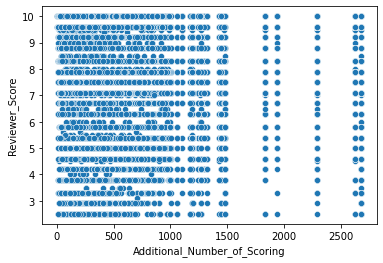

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


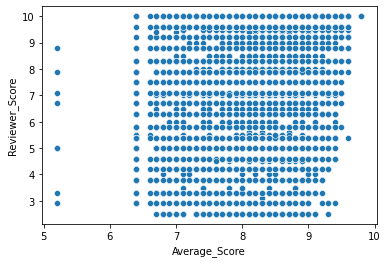

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


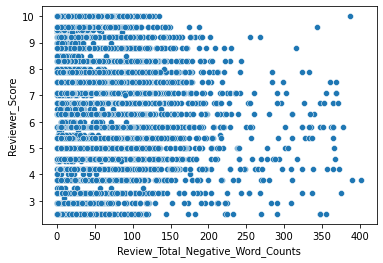

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


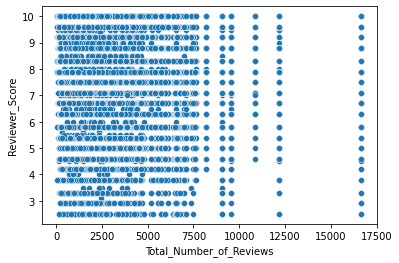

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


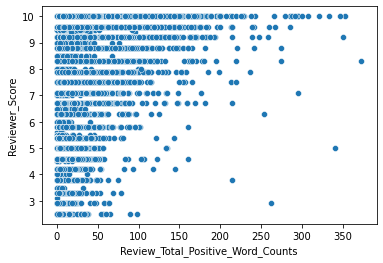

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


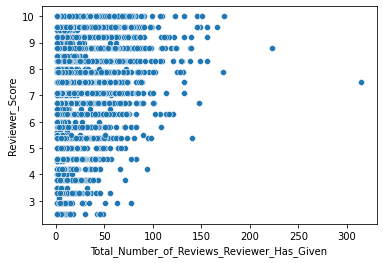

In [ ]:
num = ['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given']
for feature in num: 
  sns.scatterplot(df_new[feature],df_new['Reviewer_Score'])
  plt.show()

#Inference: mentioned numerical columns are not having any linear relationship with target variable i.e 'Reviewer_Score'  

In [ ]:
# cat = ['review_month',
#  'Stayed nights',
#  'yr']
cat_features
# df_new['Hotel_Country'].value_counts(),Trip

['reviews',
 'Hotel_Country',
 'Trip',
 'test_reviews',
 'test_positive_review',
 'test_negative_review']

Not doing any Statistical Test as our independent features are not having any linearity with the target variable

Label Encodding: for categorical column

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df_new['Hotel_Country']= label_encoder.fit_transform(df_new['Hotel_Country'] )
df_new['Trip']= label_encoder.fit_transform(df_new['Trip'] ) 

In [ ]:
df_new.head(2)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,reviews,Hotel_Country,review_month,Trip,Stayed nights,yr,test_reviews,test_positive_review,test_negative_review
0,241,8.2,138,2500,48,8,7.5,Bathtub and sink flush wasn t working properl...,4,8,1,6,2016,[bathtub and sink flush was not t working prop...,[we ve had a room with sea view and was lovely...,[bathtub and sink flush was not t working prop...
1,493,8.6,23,2865,9,3,5.4,The bedroom was tight and very small They exp...,3,12,0,2,2016,[the bedroom was tight and very small they exp...,[to be near to the main train station],[the bedroom was tight and very small they exp...


**Base Model Building**  <b>
Without any review columns and <b>
Taking 'Reviewer_Score' as target variable <b>


In [ ]:
X = df_new.drop(['reviews','test_reviews','test_positive_review','test_negative_review'],axis=1)
y = df_new['Reviewer_Score']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


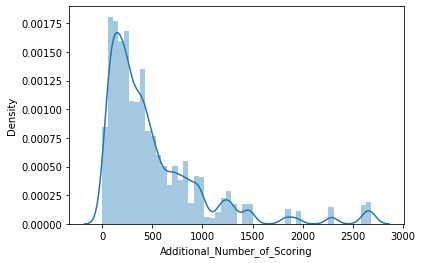

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


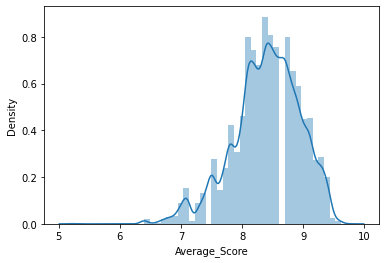

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


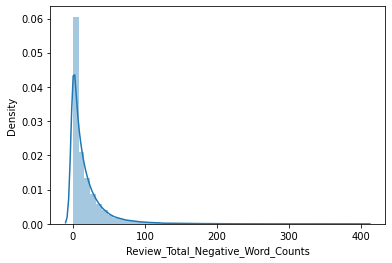

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


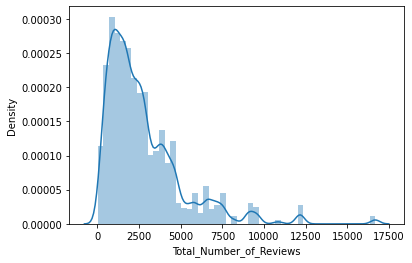

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


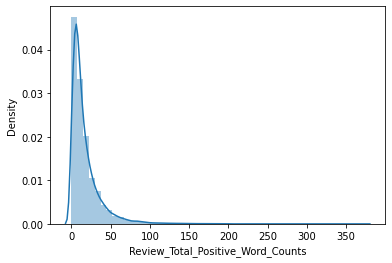

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


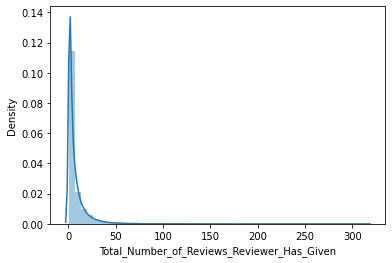

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


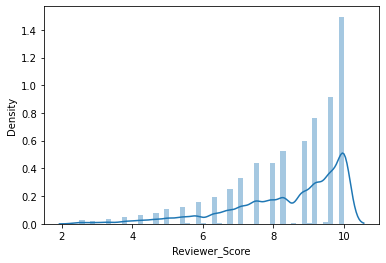

In [ ]:
# distributions of the numerical columns
num = ['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score']
for feature in num: 
  sns.distplot(X[feature])
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# from missingpy import KNNImputer

In [ ]:
X.isnull().sum() #No null values we dont require to treat 

Additional_Number_of_Scoring                  0
Average_Score                                 0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Hotel_Country                                 0
review_month                                  0
Trip                                          0
Stayed nights                                 0
yr                                            0
dtype: int64

In [ ]:
sc =StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X),columns = X.columns)

In [ ]:
X_std.head(2)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Hotel_Country,review_month,Trip,Stayed nights,yr
0,-0.519816,-0.360680,4.095994,-0.113568,1.410892,0.072453,-0.546726,0.215795,0.450586,0.315831,2.517421,-0.173866
1,-0.023631,0.366395,0.157978,0.041626,-0.402445,-0.381082,-1.830285,-0.366753,1.647243,-2.095350,-0.204602,-0.173866


WE will go with Non Linear model as there are no high multicollinearity

In [ ]:
dt_model = DecisionTreeRegressor()
#n_neighbors ideal search range could be 15-20% of size of data
param={'max_depth':np.arange(1,15)}
GS=GridSearchCV(dt_model,param,cv=3,scoring='neg_mean_squared_error')
GS.fit(X_std,y)
GS.best_params_


{'max_depth': 7}

In [ ]:
#we do k-fold cross validation now
dt_reg = DecisionTreeRegressor(max_depth=7)
dt_reg.fit(X_std,y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
score = model_selection.cross_val_score(dt_reg,X_std,y,cv=5,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
print('bias_error',np.mean(rmse))
print('var_error',np.std(rmse,ddof=1))

bias_error 0.00040130637234989645
var_error 0.0008973483274687731


In [ ]:
1-(np.mean(rmse)+np.std(rmse,ddof=1)),1-(np.mean(rmse)-np.std(rmse,ddof=1))

(0.9987013453001813, 1.000496041955119)

In [ ]:
#With RandomForestRegressor
rf_be=[]
rf_ve=[]
for n in np.arange(1,50):
    rf = RandomForestRegressor(n_estimators=n)
#     kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    score = model_selection.cross_val_score(rf,X_std,y,cv= 3,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(score))
    rf_be.append(np.mean(rmse)),rf_ve.append(np.std(rmse,ddof=1))

(0.000312947493245894, 1)

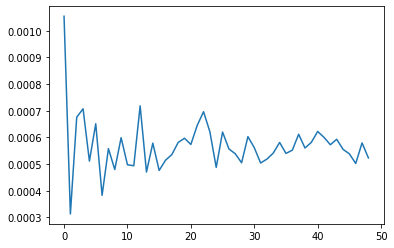

In [ ]:
x_axis=np.arange(len(rf_ve))
plt.plot(x_axis,rf_ve)
np.min(rf_ve),np.argmin(rf_ve)

In [ ]:
#So at n_estimators = 7 we get the Variance error very less 
rf = RandomForestRegressor(n_estimators=7)
rf.fit(X_std,y)
score=model_selection.cross_val_score(rf,X_std,y,cv= 3,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
np.mean(rmse),np.std(rmse,ddof=1)

(0.0008932751934945044, 0.0005809399074628273)

In [ ]:
np.mean(rmse)+np.std(rmse,ddof=1),np.mean(rmse) - np.std(rmse,ddof=1)

(0.0014742151009573315, 0.00031233528603167714)

Our model will predict the 'Reviewer_score' with avg difference of 0.0008932751934945009


In [ ]:
1-(np.mean(rmse)+np.std(rmse,ddof=1)),1-(np.mean(rmse) - np.std(rmse,ddof=1))
#Our model accuracy is ranging from 99.8 to 99.9%

(0.9985257848990426, 0.9996876647139683)

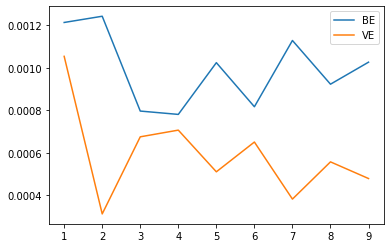

In [ ]:
plt.plot(np.arange(1,10),rf_be[:9],label='BE')
plt.plot(np.arange(1,10),rf_ve[:9],label = 'VE')
plt.legend()

# ***Now building the base model by including the reviews too***


*   Before including the text : Preprocessing of the text need to be done (removing the text stopwords)
*   And then converting text into numerical of the reviews (i.e taking only the reviews column which is combined review)



In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
stopwords_l = stopwords.words('english')
stopwords_l.remove('not')


In [ ]:
'not' in stopwords_l

False

In [ ]:
df_new['test_reviews'][0]

['bathtub and sink flush was not t working properly even if we told the reception the second day they removed the hand soap and did not t replaced it until we told the reception on the fourth day cleaning ladies forgot to clean our room once even if we left every morning at am swimming pool sun chairs are not free each a bit expensive imho considering you can have sun chairs and one umbrella for on the beach same for hotel bike rent for hrs is way too much when you can rent a bicycle for per day in barcelona centre overall barcelona has got a general drainage issue and sometimes the whole area gets quite smelly and hotel rooms too not their fault but the hotel management should consider it we ve had a room with sea view and was lovely the location is great if you want to go to the beach everyday and stay away from the crowd of barcelona centre mattresses really comfy on big beds the hotel is quite modern and stylish']

In [ ]:
def corpus_text(x):
  lem = WordNetLemmatizer()
  rv = re.sub('[^a-zA-Z]',' ',x)
  rv = rv.lower()
  rv = rv.split()
    
  rv = [lem.lemmatize(word) for word in rv if not word in stopwords_l]
  rv =' '.join(rv)
  return rv


In [ ]:
df_new['reviews_processed'] = df_new['test_reviews'].apply(lambda x: corpus_text(str(x)))
df_new['positive_reviews_processed'] = df_new['test_positive_review'].apply(lambda x: corpus_text(str(x)))
df_new['negative_reviews_processed'] = df_new['test_negative_review'].apply(lambda x: corpus_text(str(x)))

In [ ]:
df_new.columns

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'reviews', 'Hotel_Country', 'review_month', 'Trip', 'Stayed nights',
       'yr', 'test_reviews', 'test_positive_review', 'test_negative_review',
       'reviews_processed', 'positive_reviews_processed',
       'negative_reviews_processed'],
      dtype='object')

In [ ]:
df_new.head(2)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,reviews,Hotel_Country,review_month,Trip,Stayed nights,yr,test_reviews,test_positive_review,test_negative_review,reviews_processed,positive_reviews_processed,negative_reviews_processed
0,241,8.2,138,2500,48,8,7.5,Bathtub and sink flush wasn t working properl...,4,8,1,6,2016,[bathtub and sink flush was not t working prop...,[we ve had a room with sea view and was lovely...,[bathtub and sink flush was not t working prop...,bathtub sink flush not working properly even t...,room sea view lovely location great want go be...,bathtub sink flush not working properly even t...
1,493,8.6,23,2865,9,3,5.4,The bedroom was tight and very small They exp...,3,12,0,2,2016,[the bedroom was tight and very small they exp...,[to be near to the main train station],[the bedroom was tight and very small they exp...,bedroom tight small explain hotel built old fa...,near main train station,bedroom tight small explain hotel built old fa...


In [ ]:
#Calculating the polarity score of combined positive and negative review
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df_new['Combined_pos'] = df_new['reviews_processed'].apply(lambda x:sid.polarity_scores(x)['pos'])
df_new['Combined_neg'] = df_new['reviews_processed'].apply(lambda x:sid.polarity_scores(x)['neg'])
df_new['Combined_neu'] = df_new['reviews_processed'].apply(lambda x:sid.polarity_scores(x)['neu'])

In [ ]:
# using tfidf vectorization to convert the 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()
# corpus_tfidf = tfidf.fit_transform(corpus_df['corpus']).toarray()

In [ ]:

tf = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english')
#min_df is used for removing terms that appear too frequently
#min_df = 0.01 means "ignore terms that appear in less than 1% of the documents
tfidf_matrix = tf.fit_transform(df_new['reviews_processed']).toarray()

In [ ]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(tfidf_matrix),tfidf_matrix.shape  #20502 unique words in our reviews hence we got 20502 columns

(49677, (49677, 20502))

In [ ]:
# X : combined revies and y = Combined_pos,Combined_neg

X = df_new['reviews_processed']
y = df_new['Combined_pos']
y1=df_new['Combined_neg']

In [ ]:
# dt_model = DecisionTreeRegressor()
# #n_neighbors ideal search range could be 15-20% of size of data
# param={'max_depth':np.arange(1,10)}
# GS=GridSearchCV(dt_model,param,cv=3,scoring='neg_mean_squared_error')
# GS.fit(tfidf_matrix,y)
# GS.best_params_


In [ ]:
from sklearn.pipeline import Pipeline
#Sub model 1: where target variable : 'Combined_pos'
model1 = Pipeline([('tfidf', TfidfVectorizer(analyzer='word', min_df=0,stop_words= stopwords_l)),
                     ('dt', DecisionTreeRegressor(max_depth=55)),
])
model1.fit(X,y)
print('Score:',model1.score(X,y))
scores = model_selection.cross_val_score(model1, X, y, cv= 3, scoring='neg_mean_squared_error')
rmse = np.sqrt(np.abs(score))
print('bias_error',np.mean(rmse))
print('var_error',np.std(rmse,ddof=1))

Score: 0.9460718377669801
bias_error 0.0008932751934945044
var_error 0.0005809399074628273


In [ ]:
model1.predict(pd.Series(['the intent behind the movie good but soul was missing']))

array([0.1941068])

In [ ]:
model1.predict(pd.Series(['intent behind movie good soul missing']))

array([0.1941068])

In [ ]:
sid.polarity_scores('intent behind movie good soul missing')

{'compound': 0.1779, 'neg': 0.242, 'neu': 0.44, 'pos': 0.319}

In [ ]:
# sid.polarity_scores('the intent behind the movie good but soul was missing')

In [ ]:
# 0.31-0.08,0.31+0.08
0.08-0.06,0.08+0.06

(0.020000000000000004, 0.14)

In [ ]:
0.319-0.194,0.125<0.14

(0.125, True)

In [ ]:
#Sub model 2: where target variable : 'Combined_neg'
model2 =  Pipeline([('tfidf', TfidfVectorizer(analyzer='word', min_df=0,stop_words= stopwords_l)),
                     ('dt', DecisionTreeRegressor(max_depth=95)),
])
model2.fit(X,y1)
print('Score:',model2.score(X,y1))
scores = model_selection.cross_val_score(model2, X, y1, cv= 3, scoring='neg_mean_squared_error')
rmse = np.sqrt(np.abs(score))
print('bias_error',np.mean(rmse))
print('var_error',np.std(rmse,ddof=1))

Score: 0.9164581314888661
bias_error 0.0008932751934945044
var_error 0.0005809399074628273


In [ ]:
# building the submodels for positive and negative review also

In [ ]:
# df_new.head(2)

In [ ]:
df_new.to_pickle("/content/drive/My Drive/capstone/updated_processed.pkl")

Building the models for Positive reviews 

In [ ]:
positive_reviews = pd.DataFrame()
positive_reviews['positive_reviews_processed'] = df_new['positive_reviews_processed']

positive_reviews['Positive_pos'] = positive_reviews['positive_reviews_processed'].apply(lambda x:sid.polarity_scores(x)['pos'])
positive_reviews['Positive_neg'] = positive_reviews['positive_reviews_processed'].apply(lambda x:sid.polarity_scores(x)['neg'])
positive_reviews['Positive_neu'] = positive_reviews['positive_reviews_processed'].apply(lambda x:sid.polarity_scores(x)['neu'])
positive_reviews

,positive_reviews_processed,Positive_pos,Positive_neg,Positive_neu
0,room sea view lovely location great want go be...,0.305,0.0,0.695
1,near main train station,0.000,0.0,1.000
2,great ipads room breakfast amazing,0.725,0.0,0.275
3,location excellent champ elysees minute walk a...,0.484,0.0,0.516
4,amazing location quality hotel close tube stat...,0.402,0.0,0.598
...,...,...,...,...
49672,bed double family instead single bed,0.000,0.0,1.000
49673,well equipped compact room fabulous setting ov...,0.407,0.0,0.593
49674,thought hotel lacked every aspect hospitality ...,0.080,0.0,0.920
49675,lovely location st katharines dock lovely,0.655,0.0,0.345


In [ ]:
# X : positive revies and y = positive_pos,negative_neg

pos_X = positive_reviews['positive_reviews_processed']
pos_y = positive_reviews['Positive_pos']
pos_y1=positive_reviews['Positive_neg']

In [ ]:
#Sub model 1: where target variable : 'Positive_pos'
Pos_model1 =  Pipeline([('tfidf', TfidfVectorizer(analyzer='word', min_df=0,stop_words= stopwords_l)),
                     ('dt', DecisionTreeRegressor()),
])
Pos_model1.fit(pos_X,pos_y)
print('Score:',Pos_model1.score(pos_X,pos_y))
# scores = model_selection.cross_val_score(Pos_model1, pos_X, pos_y, cv= 3, scoring='neg_mean_squared_error')
# rmse = np.sqrt(np.abs(score))
# print('bias_error',np.mean(rmse))
# print('var_error',np.std(rmse,ddof=1))

In [ ]:
# dt_model = DecisionTreeRegressor()
#n_neighbors ideal search range could be 15-20% of size of data
param={'max_depth':np.arange(1,10)}
GS=GridSearchCV(Pos_model1,param,cv=3,scoring='neg_mean_squared_error')
GS.fit(pos_X,pos_y)
# Pos_model1.fit()
GS.best_params_

In [ ]:
df_new.head()

In [ ]:
# grid = GridSearchCV(model2, cv=3,scoring='neg_mean_squared_error')
# grid.fit(train['text'], train['output'])
# grid.score(test['text'], test['output'])

In [ ]:
# dt_model = DecisionTreeRegressor()
# #n_neighbors ideal search range could be 15-20% of size of data
# param={'max_depth':np.arange(1,10)}
# GS=GridSearchCV(model2,param,cv=3,scoring='neg_mean_squared_error')
# GS.fit(pd.DataFrame(tfidf_matrix),y1)
# GS.best_params_

In [ ]:
# model1.score(X,y)
# dt= DecisionTreeRegressor(max_depth=55)
# score = model_selection.cross_val_score(dt,tfidf_matrix,y,cv=5,scoring='neg_mean_squared_error')
# rmse = np.sqrt(score)
# print('bias_error',np.mean(rmse))
# print('var_error',np.std(rmse,ddof=1))

In [ ]:
# params={'model__C':[.01,.05,.1,.5,1,5,10],
#            'model__penalty':['l1','l2']}
# pipeline = Pipeline([
#     ('vect', CountVectorizer(min_df=40,ngram_range=(1,4))),
#     ('tfidf', TfidfTransformer()),
#     ('model',LogisticRegression())])
# grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params ,scoring='roc_auc')
# grid.fit(train['text'], train['output'])
# grid.score(test['text'], test['output'])

In [ ]:
# # Linear SVC:
# text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
#                      ('clf', LinearSVC()),
# ])

In [ ]:
sid.polarity_scores('quite good but not good')

In [ ]:
sid.polarity_scores('intent behind movie great not better')